In [10]:
import joblib
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import (
                                    StratifiedKFold, 
                                    cross_validate
                                    )
from sklearn.metrics import confusion_matrix
warnings.filterwarnings('ignore')

### 1. Load the data

In [11]:
X_train = np.load('artifacts/X_train.npz')['arr_0']
Y_train = np.load('artifacts/Y_train.npz')['arr_0']
X_test = np.load('artifacts/X_test.npz')['arr_0']
Y_test = np.load('artifacts/Y_test.npz')['arr_0']

### 2. Define Multi Models

In [12]:
models ={
        'Logistic Regression' : LogisticRegression(),
        'Decision Tree' : DecisionTreeClassifier(),
        'Random Forest' : RandomForestClassifier()
}

### 3. Configure K-fold CV

In [13]:
cv = StratifiedKFold(
                      n_splits =6,
                      random_state=42,
                      shuffle= True
                    )


In [14]:
trained_models = {}
for model_name, model in models.items():
  print(f"\nCross validation on {model_name}")

  cv_results = cross_validate(
                            model,
                            X_train,
                            Y_train,
                            cv =cv, scoring= 'f1',
                            return_train_score= False,
                            return_estimator=True
                          )

  test_scores = cv_results['test_score']

  best_index = np.argmax(test_scores)

  estimator = cv_results['estimator'][best_index]
  trained_models[model_name] = estimator


Cross validation on Logistic Regression

Cross validation on Decision Tree

Cross validation on Random Forest


In [15]:
Y_hat_tests = {}
for model_name, model in trained_models.items():
  Y_hat_test = model.predict(X_test)
  Y_hat_tests[model_name] = Y_hat_test
Y_hat_tests


{'Logistic Regression': array([0, 0, 0, ..., 0, 0, 1], shape=(1999,)),
 'Decision Tree': array([0, 1, 0, ..., 1, 0, 1], shape=(1999,)),
 'Random Forest': array([0, 0, 0, ..., 1, 0, 1], shape=(1999,))}

In [18]:
cm1 = confusion_matrix(Y_test, Y_hat_tests['Logistic Regression'])
cm2 = confusion_matrix(Y_test, Y_hat_tests['Decision Tree'])
cm3 = confusion_matrix(Y_test, Y_hat_tests['Random Forest'])

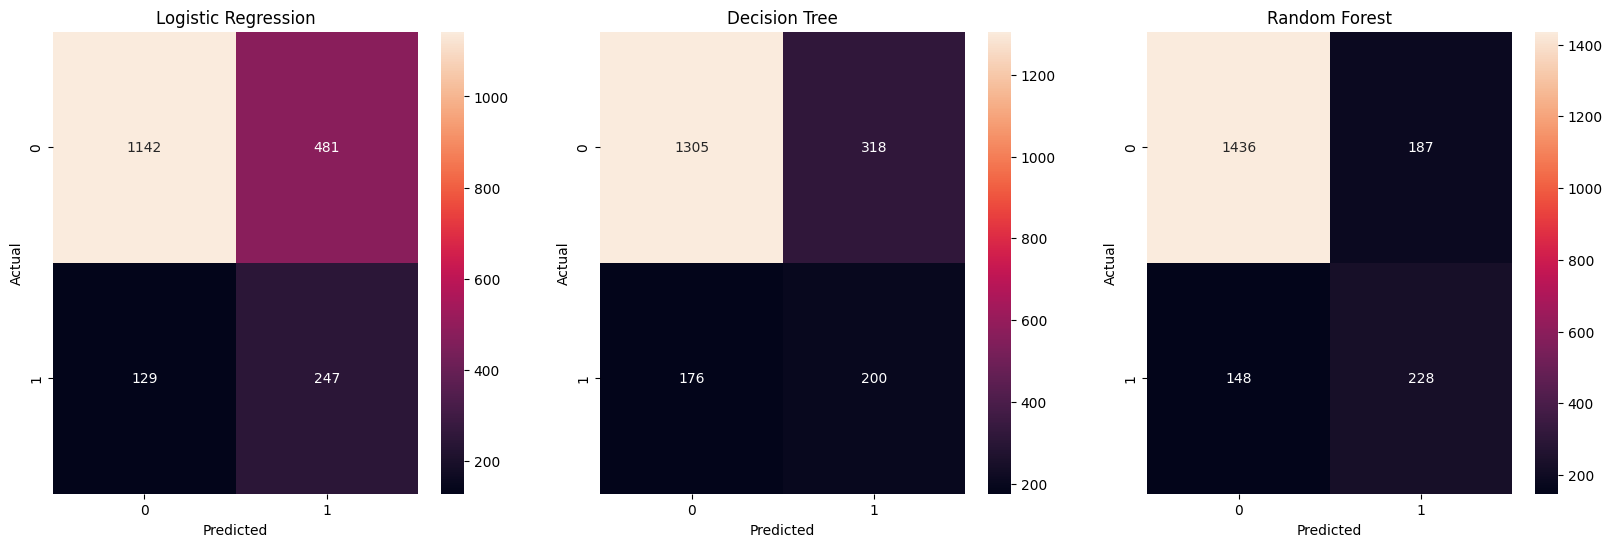

In [19]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 6))

sns.heatmap(cm1, annot=True, fmt='d', ax=ax1)
ax1.set_title('Logistic Regression')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('Actual')

sns.heatmap(cm2, annot=True, fmt='d', ax=ax2)
ax2.set_title('Decision Tree')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')

sns.heatmap(cm3, annot=True, fmt='d', ax=ax3)
ax3.set_title('Random Forest')
ax3.set_xlabel('Predicted')
ax3.set_ylabel('Actual')

plt.show()